# Problem1

In [228]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
yelp_df = pd.read_csv('yelp.csv')
yelp_df.head(30)

,user_id,name,review_count,yelping_since,useful,funny,cool,fans,elite,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,0,0,0,0,None,3.70,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,0,0,0,0,None,2.00,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,0,0,0,0,None,4.67,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,0,0,0,0,None,4.67,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,4,0,0,0,None,3.45,...,0,0,0,0,0,0,0,0,1,0
5,Ob-2oGBQ7rwwYwUvhmnf7g,B,9,2012-05-01,0,0,0,0,None,4.78,...,0,0,0,0,0,0,0,0,0,0
6,JaTVvKsBl0bHHJEpESn4pQ,Peter,2,2013-03-23,0,0,0,0,None,5.00,...,0,0,0,0,0,0,0,0,0,0
7,Ykj0DVsz0c6rX9ghjd0hDg,Colleen,1,2010-10-10,0,0,0,0,None,1.00,...,0,0,0,0,0,0,0,0,0,0
8,kmyEPfKnHQJdTceCdoyMQg,A,7,2012-10-16,0,0,0,0,None,4.29,...,0,0,0,0,0,0,0,0,0,0
9,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,0,0,0,0,None,5.00,...,0,0,0,0,0,0,0,0,0,0


In [229]:
preprocess_df = yelp_df[["review_count","average_stars","useful","funny","cool","fans",
                         "compliment_hot","compliment_more","compliment_profile","compliment_cute",
                        "compliment_list","compliment_note","compliment_plain","compliment_cool",
                        "compliment_funny","compliment_writer","compliment_photos"]]
ss = StandardScaler()
std_df = ss.fit_transform(preprocess_df)
std_df = pd.DataFrame(std_df)
std_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.165834,-0.009673,-0.041572,-0.029372,-0.02928,-0.102007,-0.033114,-0.025646,-0.014003,-0.016392,-0.008376,-0.027923,-0.037571,-0.039174,-0.039174,-0.039052,-0.01193
1,-0.279617,-1.526554,-0.041572,-0.029372,-0.02928,-0.102007,-0.033114,-0.025646,-0.014003,-0.016392,-0.008376,-0.027923,-0.037571,-0.039174,-0.039174,-0.039052,-0.01193
2,-0.216404,0.855842,-0.041572,-0.029372,-0.02928,-0.102007,-0.033114,-0.025646,-0.014003,-0.016392,-0.008376,-0.027923,-0.037571,-0.039174,-0.039174,-0.039052,-0.01193
3,-0.254332,0.855842,-0.041572,-0.029372,-0.02928,-0.102007,-0.033114,-0.025646,-0.014003,-0.016392,-0.008376,-0.027923,-0.037571,-0.039174,-0.039174,-0.039052,-0.01193
4,-0.153192,-0.232744,-0.035906,-0.029372,-0.02928,-0.102007,-0.033114,-0.025646,-0.014003,-0.016392,-0.008376,-0.027923,-0.037571,-0.039174,-0.039174,-0.009795,-0.01193


In [230]:
reducer = PCA(n_components=5, whiten=True)
reduced = reducer.fit_transform(std_df)
yelp_pca_df = pd.DataFrame(reduced, columns=["PCA_1", "PCA_2", "PCA_3", "PCA_4", "PCA_5"])
yelp_pca_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-0.044644,0.057756,0.121481,0.002799,0.068646
1,-0.049568,0.079961,0.269575,1.513809,0.074103
2,-0.045988,0.061832,0.103281,-0.862490,0.116142
3,-0.047352,0.067332,0.125054,-0.863516,0.132762
4,-0.041076,0.055521,0.126656,0.225847,0.056752
5,-0.044570,0.055963,0.076152,-0.959434,0.102395
6,-0.047645,0.068057,0.116243,-1.157769,0.146921
7,-0.050057,0.083319,0.318267,2.404449,0.047983
8,-0.045719,0.061275,0.114526,-0.523705,0.100677
9,-0.047191,0.066224,0.108985,-1.157427,0.141381


# Problem2

In [271]:
yelp_arr = np.array(yelp_pca_df)
def k_means(yelp_arr,vertices=10,T=1000,batch_size=2000,centroids=np.array([])):
    """
    Performing Kmeans
    
    Args:
        yelp_arr: row*col numpy array, m is the users, n is the features
        vertices: The number of centroids
        T: The number of iterations to update the centroids
        batch_size: Batch size of each iteration
        centroids: If not initialized, will use random points as centroids
        
    Return:
        centroids
    """
    row,col = yelp_arr.shape
    v = [0 for _ in range(vertices)] # 
    d = [0 for _ in range(batch_size)]
    if centroids.size == 0:
        centroids = yelp_arr[np.random.randint(0, row, vertices)]

    for i in range(T):
        samples_idx = np.random.randint(0, row, batch_size)
        samples = yelp_arr[samples_idx] # Get samples from array
        for x in range(batch_size):
            distance = np.linalg.norm(samples[x]-centroids,2,1)
            d[x] = np.argmin(distance) # Cache the center nearest to x
        for x in range(batch_size):
            c = d[x] # Get cached center for this x
            v[c] += 1 # Update per-center counts
            eta = 1/v[c] # Get per-center learning rate
            centroids[c] = (1-eta)*centroids[c] + eta*samples[x] # Take gradient step  
    return centroids

In [272]:
def distance(yelp_arr,centroids):
    """
    
    Calculate maximum, minimum and mean distance of the Kmeans with the centroids
    
    """
    min_distance = [0 for _ in range(len(centroids))]
    max_distance = [0 for _ in range(len(centroids))]
    mean_distance = 0
    row,col = yelp_arr.shape
    for i in range(row):
        d = np.linalg.norm(yelp_arr[i]-centroids,2,1)
        mean_distance += min(d)
        idx = np.argmin(d)
        if min_distance[idx] > d[idx]:
            min_distance[idx] = d[idx]
            
        idx = np.argmax(d)
        if max_distance[idx] < d[idx]:
            max_distance[idx] = d[idx]
    mean_distance /= row
    return (np.average(min_distance),np.average(max_distance),mean_distance)

In [248]:
kmeans_centroids = k_means(yelp_arr,vertices=10,T=1000,batch_size=2000)
kmeans_centroids

array([[-4.48743810e-02,  5.98935088e-02,  9.06318984e-02,
        -1.14512481e+00,  1.28546915e-01],
       [-4.06243782e-02,  4.85056601e-02,  6.66342666e-02,
        -8.26066883e-01,  8.83932881e-02],
       [-3.44333662e-02,  5.89802813e-02,  1.31398169e-01,
        -1.15789740e+00,  1.60387573e-01],
       [-3.15914758e-02,  2.67666788e-02,  1.04732965e-02,
        -5.02018798e-01,  2.70443878e-02],
       [-4.35131190e-02,  7.54046648e-02,  3.13057722e-01,
         2.33081085e+00,  4.10353962e-02],
       [-4.39702629e-02,  6.27527494e-02,  2.05163145e-01,
         1.25757872e+00,  4.29310778e-02],
       [-3.29879929e-02,  3.50640153e-02,  6.72211184e-02,
        -8.25441873e-02,  3.50690838e-02],
       [ 2.45202867e+00, -2.60238947e+00, -4.93591436e+00,
         2.42000742e-01, -2.15162409e+00],
       [-3.81455275e-02,  4.66268940e-02,  1.20490932e-01,
         5.11485630e-01,  3.40424987e-02],
       [ 1.79251399e-01, -3.56740473e-01, -1.10567836e+00,
        -2.67837875e-03

# Problem3

In [273]:
def KMPP(yelp_arr,vertices=10):
    """
    Initialize the centroids with Kmeans++
    """
    row,col = yelp_arr.shape
    centroids = np.array([[float(0) for _ in range(col)] for _ in range(vertices)])
    min_dist = [float('Inf') for _ in range(row)]
    for i in range(vertices):
        sum_dist = 0
        min_dist = np.minimum(min_dist,np.linalg.norm(yelp_arr-centroids[i],2,1)) # The minimum distance between the sample and all centroids
        sum_dist = sum(min_dist)
        p = min_dist/sum_dist # The probability distribution
        idx = np.random.choice(list(range(row)), p=p)
        centroids[i] = yelp_arr[idx]
    return centroids

In [250]:
init_centroids = KMPP(yelp_arr,vertices=10)
KMPP_centroids = k_means(yelp_arr,vertices=10,T=1000,batch_size=2000,centroids=init_centroids)
KMPP_centroids

array([[-4.58295205e-02,  6.64974731e-02,  1.15493622e-01,
        -1.15764923e+00,  1.46453759e-01],
       [ 5.79295060e+01, -5.85701952e+01,  7.35742163e+01,
        -5.10877516e+00, -4.32291908e+01],
       [ 4.54347264e-01, -8.05327714e-01, -2.20637252e+00,
         6.73878706e-02, -1.37150290e+00],
       [-3.62157626e-02,  4.29469765e-02,  9.08997560e-02,
        -1.69653335e-01,  5.63955592e-02],
       [-4.02356678e-02,  4.65674870e-02,  5.37799651e-02,
        -9.91838789e-01,  9.13542923e-02],
       [ 5.97505537e-02, -1.51428409e-01, -5.22003074e-01,
        -7.86447623e-02, -3.63436630e-01],
       [-3.97113605e-02,  5.08515878e-02,  1.37804817e-01,
         5.97122457e-01,  4.03131535e-02],
       [ 5.51583777e+00, -4.81722274e+00, -8.10587882e+00,
         4.80057253e-01, -2.18289192e+00],
       [-4.79110865e-02,  7.63362167e-02,  2.82281116e-01,
         2.05769550e+00,  4.51633760e-02],
       [-3.79549687e-02,  4.22851113e-02,  5.42486668e-02,
        -6.61414024e-01

# Problem4

In [274]:
def init_centroids(yelp_arr,vertices=10):
    mean_point = np.average(yelp_arr,0)
    row,col = yelp_arr.shape
    section_size = row//vertices # Divide the data array into mutiple vertices
    centroids = np.array([[float(0) for _ in range(col)] for _ in range(vertices)])
    for i in range(vertices):
        end = row if i == vertices-1 else (i+1)*section_size
        start = i*section_size
        distance = np.linalg.norm(yelp_arr[start:end]-mean_point,2,1)
        centroids[i] = yelp_arr[start+np.argmax(distance)] # Cache the center farthest to mean point
    return centroids         

In [252]:
init_centroids = init_centroids(yelp_arr,vertices=10)
custom_centroids = k_means(yelp_arr,vertices=10,T=1000,batch_size=2000,centroids=init_centroids)
custom_centroids

array([[ 1.71325994e+02,  8.55113283e+00, -1.44329020e+01,
         4.39703136e+00,  1.07498993e+02],
       [ 1.08694090e+02,  1.15104818e+02,  2.80212893e-01,
        -1.33151644e+00, -3.21354984e+01],
       [ 1.46549363e+02, -6.93073760e+01, -7.98806083e+01,
         2.37430590e+01,  7.69268893e+02],
       [ 1.29026418e+01, -1.18233887e+01, -1.71687704e+01,
         1.10529933e+00, -3.57247879e+00],
       [ 4.59850322e+01, -1.92364391e+01, -6.62572948e-01,
         1.18839512e+00,  3.65214332e+01],
       [ 3.55430927e+02, -5.24975316e+01,  2.47816507e+02,
        -1.54223931e+01, -6.21691850e+01],
       [ 2.03510820e+02, -3.41810862e+01,  1.61279035e+02,
        -1.06530661e+01, -5.61443545e+01],
       [-1.03803662e-02,  6.23764592e-03,  3.96020463e-03,
         8.71221236e-04, -1.20667855e-04],
       [ 4.30605589e+01, -6.42364999e+01,  6.47640503e+01,
        -4.60229980e+00, -4.31292019e+01],
       [ 5.66429799e+02,  8.22511704e+02, -3.50827168e+01,
        -8.89730724e+00

# Problem5

In [281]:
import logging
# Setting up logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
fh = logging.FileHandler("project1.log")
fh.setLevel(logging.DEBUG)
# Set streamhandler to print log，level debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
# Set logging format
formatter = logging.Formatter("%(asctime)s - %(name)s %(funcName)s - %(lineno)d - %(levelname)s - %(message)s")
ch.setFormatter(formatter)
fh.setFormatter(formatter)
# Add handler to each logger
logger.addHandler(ch)
logger.addHandler(fh)

In [284]:
from sklearn.cluster import MiniBatchKMeans
kmeans_meand = []
KMPP_meand = []
custom_meand =[]
kmeans_mind = []
KMPP_mind = []
custom_mind = []
kmeans_maxd = []
KMPP_maxd = []
custom_maxd = []

logger.info("Traning start")
for vertices in [5,10,20,50,100,150,200,250,300,350,400,450,500]:
    logger.info("Vertices number is {}".format(vertices))
    model1 = MiniBatchKMeans(n_clusters=vertices, init='random', max_iter=1000, batch_size=100,random_state=33)
    model1 = model1.fit(yelp_arr)
    kmeans_centroids = model1.cluster_centers_
    min_d,max_d,mean_d = distance(yelp_arr,kmeans_centroids)
    kmeans_meand.append(mean_d)
    kmeans_mind.append(min_d)
    kmeans_maxd.append(max_d)
    

    model2 = MiniBatchKMeans(n_clusters=vertices, init='k-means++', max_iter=1000, batch_size=100,random_state=33)
    model2 = model2.fit(yelp_arr)
    kmpp_centroids = model2.cluster_centers_
    min_d,max_d,mean_d = distance(yelp_arr,kmpp_centroids)
    KMPP_meand.append(mean_d)
    KMPP_mind.append(min_d)
    KMPP_maxd.append(max_d)

    custom_centroids = init_centroids(yelp_arr,vertices=vertices)
    model3 = MiniBatchKMeans(n_clusters=vertices, init=custom_centroids, max_iter=1000, batch_size=100,random_state=33)
    model3 = model3.fit(yelp_arr)
    custom_centroids = model3.cluster_centers_
    min_d,max_d,mean_d = distance(yelp_arr,custom_centroids)
    custom_meand.append(mean_d)
    custom_mind.append(min_d)
    custom_maxd.append(max_d)

2018-11-26 22:26:51,471 - __main__ <module> - 6 - INFO - Traning start
2018-11-26 22:26:51,478 - __main__ <module> - 8 - INFO - Vertices number is 5
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Explicit initial center position passed: performing only one init in MiniBatchKMeans instead of n_init=3
2018-11-26 22:29:01,428 - __main__ <module> - 8 - INFO - Vertices number is 10
2018-11-26 22:30:48,499 - __main__ <module> - 8 - INFO - Vertices number is 20
2018-11-26 22:32:45,244 - __main__ <module> - 8 - INFO - Vertices number is 50
2018-11-26 22:35:10,924 - __main__ <module> - 8 - INFO - Vertices number is 100
2018-11-26 22:37:57,982 - __main__ <module> - 8 - INFO - Vertices number is 150
2018-11-26 22:41:08,778 - __main__ <module> - 8 - INFO - Vertices number is 200
2018-11-26 22:44:46,860 - __main__ <module> - 8 - INFO - Vertices number is 250
2018-11-26 22:48:44,635 - __main__ <module> - 8 - INFO - Vertices number is 300
2018-11-26 22:52:58,229 

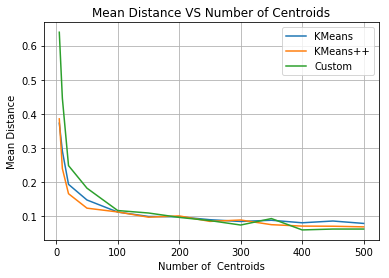

In [296]:
import matplotlib.pyplot as plt
# Plot Mean Distance vs number of centroids
centroid_num = [5,10,20,50,100,150,200,250,300,350,400,450,500]
x1=[kmeans_meand[i*3] for i in range(13)]
x2=[kmeans_meand[i*3+1] for i in range(13)]
x3=[kmeans_meand[i*3+2] for i in range(13)]
plt.plot(centroid_num, x1, label = 'KMeans')
plt.plot(centroid_num, x2, label = 'KMeans++')
plt.plot(centroid_num, x3, label = 'Custom')

plt.title('Mean Distance VS Number of Centroids')
plt.xlabel('Number of  Centroids')
plt.ylabel('Mean Distance')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

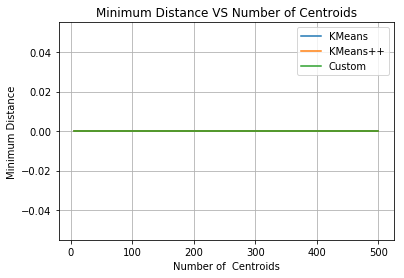

In [293]:
# Plot Minimum Distance vs number of centroids
centroid_num = [5,10,20,50,100,150,200,250,300,350,400,450,500]
x1=[kmeans_mind[i*3] for i in range(13)]
x2=[kmeans_mind[i*3+1] for i in range(13)]
x3=[kmeans_mind[i*3+2] for i in range(13)]
plt.plot(centroid_num, x1, label = 'KMeans')
plt.plot(centroid_num, x2, label = 'KMeans++')
plt.plot(centroid_num, x3, label = 'Custom')

plt.title('Minimum Distance VS Number of Centroids')
plt.xlabel('Number of  Centroids')
plt.ylabel('Minimum Distance')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

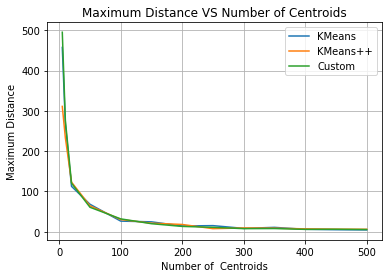

In [295]:
# Plot Maximum Distance vs number of centroids
centroid_num = [5,10,20,50,100,150,200,250,300,350,400,450,500]
x1=[kmeans_maxd[i*3] for i in range(13)]
x2=[kmeans_maxd[i*3+1] for i in range(13)]
x3=[kmeans_maxd[i*3+2] for i in range(13)]
plt.plot(centroid_num, x1, label = 'KMeans')
plt.plot(centroid_num, x2, label = 'KMeans++')
plt.plot(centroid_num, x3, label = 'Custom')


plt.title('Maximum Distance VS Number of Centroids')
plt.xlabel('Number of  Centroids')
plt.ylabel('Maximum Distance')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()